# Problem 1

In [6]:
import os 
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
os.chdir('C:/1_Jasbir/UIC_Local/Spring 2018/Text_Analytics/Assignment_3/')
df = pd.read_csv("songdata.csv", header=0, delimiter=',', quoting=0)

#Replace Url's
df['text'].replace(to_replace='http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', value='url', regex=True, inplace=True)

#Replace Hastag
df['text'].replace(to_replace='(?<=^|(?<=[^a-zA-Z0-9-_\.]))hashtag_([A-Za-z]+[A-Za-z0-9]+)', value='hashtag_', regex=True, inplace=True)

#Replace Mentions
df['text'].replace(to_replace='(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9]+)', value='', regex=True, inplace=True)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np


vect = TfidfVectorizer(min_df = 3, stop_words = 'english')
X = vect.fit_transform(df['text'])


print(X)


  (0, 15828)	0.152558828995
  (0, 9496)	0.168751565696
  (0, 30376)	0.150712487103
  (0, 16748)	0.135154208018
  (0, 25347)	0.140256994919
  (0, 29800)	0.0605349885184
  (0, 24881)	0.155489141151
  (0, 23688)	0.151112881671
  (0, 15989)	0.14198678867
  (0, 9814)	0.186798358606
  (0, 14554)	0.187346034032
  (0, 14795)	0.423830454052
  (0, 11231)	0.329320470881
  (0, 16285)	0.207221095466
  (0, 9782)	0.137274416079
  (0, 9978)	0.221720135537
  (0, 2460)	0.17770370075
  (0, 2972)	0.199470369363
  (0, 15328)	0.268568874192
  (0, 29595)	0.0935687080643
  (0, 19430)	0.149356867633
  (0, 12745)	0.157656968359
  (0, 25627)	0.253698285912
  (0, 12060)	0.0891135708194
  (0, 15714)	0.0522658424238
  :	:
  (57649, 15427)	0.267987462075
  (57649, 14912)	0.0497107176803
  (57649, 8002)	0.152893054147
  (57649, 18102)	0.228207863499
  (57649, 15927)	0.157125755392
  (57649, 5413)	0.130677484353
  (57649, 29019)	0.125691988351
  (57649, 30431)	0.103047546832
  (57649, 15194)	0.115109655563
  (57649, 2

# Problem 2 

Cluster 1 has positive words like , time etc must happy songs  
Cluster 2 has  words about baby want etc. it could be sad songs 
cluster 3 has words about love heart means love songs 

(array([37308.,     0.,     0.,     0.,     0., 15164.,     0.,     0.,
            0.,  5178.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

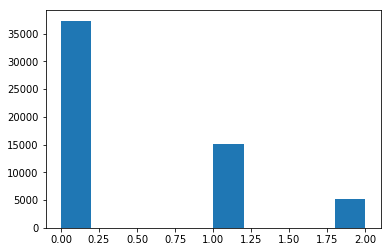

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(3)
clusters = kmeans.fit_predict(X)
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(clusters)

In [4]:
#print top 5 terms per cluster clusters    
print("Top 5 terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vect.get_feature_names()
for i in range(3):
    print ("Cluster %d:" % i,)
    for ind in order_centroids[i, :5]:
        print(' %s' % terms[ind])

Top 5 terms per cluster:
('Cluster 0:',)
 like
 ll
 just
 time
 oh
('Cluster 1:',)
 don
 know
 baby
 want
 oh
('Cluster 2:',)
 love
 know
 heart
 ll
 oh


# Problem 3

Love , heart baby,girl,dance & home is occuring in mostly in most of the components 

there are clear components that have very happy words  like christmas, rock  etc.

In [5]:
from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(50)
Z = lsa.fit_transform(X)
Z.shape

vocab = np.array(vect.get_feature_names())

for i in range(Z.shape[1]):
    print ("LSA Component %d:" % i,)
    order = np.abs(lsa.components_[i]).argsort()[::-1]
    print(vocab[order[:5]])

('LSA Component 0:',)
[u'love' u'don' u'know' u'll' u'just']
('LSA Component 1:',)
[u'love' u'don' u'got' u'heart' u'gonna']
('LSA Component 2:',)
[u'oh' u'baby' u'yeah' u'll' u'time']
('LSA Component 3:',)
[u'oh' u'don' u'want' u'baby' u'know']
('LSA Component 4:',)
[u'baby' u'don' u'oh' u'want' u'know']
('LSA Component 5:',)
[u'la' u'll' u'baby' u'got' u'yeah']
('LSA Component 6:',)
[u'la' u'll' u'got' u'baby' u'yeah']
('LSA Component 7:',)
[u'want' u'don' u'yeah' u'know' u've']
('LSA Component 8:',)
[u'yeah' u'll' u'let' u'gonna' u'want']
('LSA Component 9:',)
[u'let' u'll' u'want' u'yeah' u'don']
('LSA Component 10:',)
[u'got' u've' u'let' u'don' u'yeah']
('LSA Component 11:',)
[u'gonna' u'yeah' u've' u'know' u'oh']
('LSA Component 12:',)
[u'gonna' u'll' u'christmas' u'like' u'yeah']
('LSA Component 13:',)
[u'christmas' u'like' u'don' u'chorus' u'yeah']
('LSA Component 14:',)
[u'christmas' u'time' u'don' u'just' u'come']
('LSA Component 15:',)
[u'know' u'chorus' u'christmas' u'away

# Problem 4

Best number clusters are 6 in the lower dimension

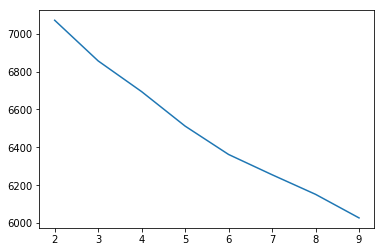

In [6]:
inertia=[]
from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(50)
Z = lsa.fit_transform(X)
Z.shape

for i in range(2, 10):
    kmeans = KMeans(i)
    kmeans.fit_predict(Z)
    inertia.append(kmeans.inertia_)

%matplotlib inline

plt.plot(range(2,10), inertia)

# Problem 5 

Campared to the features in Question 2 , The clustering in low dimension gives baby , don occurs 

Making inferences in low dimensions is hard than in clustering in high dimension, here there is clear loss of information.



In [7]:
lsa = TruncatedSVD(50)
Z = lsa.fit_transform(X)

kmeans = KMeans(7)
clusters = kmeans.fit_predict(Z)

#print top 5 terms per cluster clusters    
print("Top 5 terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
for i in range(6):
    print ("Cluster %d:" % i,)
    for ind in order_centroids[i, :5]:
        order=np.unique(order)
        order = np.abs(lsa.components_[ind]).argsort()[::-1]       
        print(vocab[order[:5]][1])
    
            
        

Top 5 terms per cluster:
('Cluster 0:',)
like
time
chorus
don
don
('Cluster 1:',)
don
baby
ll
yeah
ll
('Cluster 2:',)
don
baby
don
don
ve
('Cluster 3:',)
don
don
ll
ll
say
('Cluster 4:',)
don
don
don
ll
ll
('Cluster 5:',)
ll
ll
don
don
baby


# Problem 6 : 

Due to limit resources on my machine , i was facing issue when using PCA because it requires dense matrix and converting my X  vector matrice to dense was giving me Memory issue , After discussing with Professor used LSA to lower the dimension to 2

Please refer to below link to learn more about the error :

https://stackoverflow.com/questions/19281271/memoryerror-while-converting-sparse-matrix-to-dense-matrix-numpy-scikit

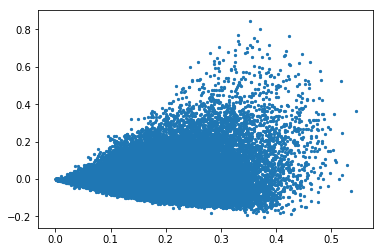

In [9]:
%matplotlib inline
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

lsa =  TruncatedSVD(2)
Z = lsa.fit_transform(X)

plt.scatter(Z[:, 0], Z[:, 1], 5) 

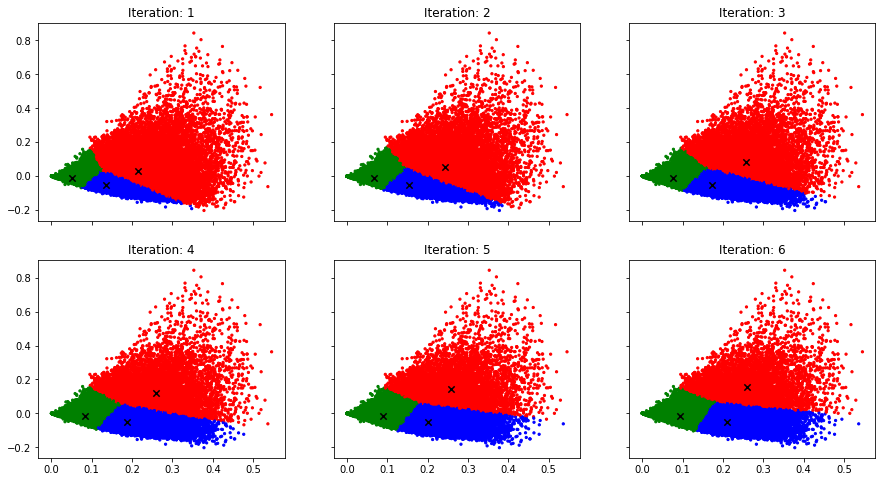

In [10]:
from sklearn.cluster import KMeans
import numpy as np 
colors = np.array(['r', 'g', 'b'])

%matplotlib inline

f, axarr = plt.subplots(2, 3,  sharex='col', sharey='row', figsize = (15, 8))

for i in range(2):
    for j in range(3):
        max_iter = i * 3 + j + 1
        kmeans = KMeans(3, init = 'random', max_iter = max_iter, random_state = 100, n_init = 1)
        clusters = kmeans.fit_predict(Z)
        axarr[i, j].scatter(Z[:, 0], Z[:, 1], 5, colors[clusters])
        axarr[i, j].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 40, 'k', 'x')
        axarr[i, j].set_title("Iteration: %d" % max_iter)